---
---
---
# Predicting House Prices In Bengaluru

![](https://www.machinehack.com/wp-content/uploads/2018/03/bangalore-now.jpg)

---
## `Source=`[MachineHack](https://www.machinehack.com/course/predicting-house-prices-in-bengaluru/)

---

Features

- [Area_type](https://codeperfectplus.github.io/codes_perfect/) – `describes the area`
- [Availability](https://codeperfectplus.github.io/codes_perfect/) – `when it can be possessed or when it is ready(categorical and time-series)`
- [Location](https://codeperfectplus.github.io/codes_perfect/) – `where it is located in Bengaluru`
- [Price](https://codeperfectplus.github.io/codes_perfect/) – `Value of the property in lakhs(INR)`
- [Size](https://codeperfectplus.github.io/codes_perfect/) – `in BHK or Bedroom (1-10 or more)`
- [Society](https://codeperfectplus.github.io/codes_perfect/) – `to which society it belongs`
- [Total_sqft](https://codeperfectplus.github.io/codes_perfect/) – `size of the property in sq.ft`
- [Bath](https://codeperfectplus.github.io/codes_perfect/) – `No. of bathrooms`
- [Balcony](https://codeperfectplus.github.io/codes_perfect/) – `No. of the balcony` 

In [1]:
import re
import numpy as np  # For Linear Algebra and math
import pandas as pd # For Dataframe 

In [2]:
# For Displaying Good Quality Graphs
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

In [3]:
from sklearn.preprocessing import LabelEncoder           # Change String Data to int value by LabelEncoding 
from sklearn.model_selection import train_test_split     # Split Data Into train_test for Check accuracy
from sklearn.metrics import mean_absolute_error          # Mean Absolute Error
from sklearn.ensemble import RandomForestRegressor       # Random_Forest_Regressor
from sklearn.metrics import r2_score                     # R2_Score
from joblib import dump                                  # To Save Model

----
---

In [4]:
# Load train Data into train_df variable
train_df = pd.read_csv('Data/train.csv')

In [5]:
print("Train Dataset :\n")
train_df.head()

Train Dataset :



,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [6]:
# Analyze DataType In Each-Columns
print("Data-types of each columns in train dataset:\n")
print(train_df.dtypes)
#There Is Need to Change Data Types

Data-types of each columns in train dataset:

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object


In [7]:
print("Training Dataset Size  :", train_df.shape)

Training Dataset Size  : (13320, 9)


check missing values (NaNs) in train dataset 👇

In [8]:
print("missing values in train dataset column wise:\n")
print(train_df.isnull().sum())

missing values in train dataset column wise:

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [9]:
print("percentage of Missing Values Society Column In Train dataset :",int(5502/train_df.shape[0]*100),"%")

percentage of Missing Values Society Column In Train dataset : 41 %


###### Reason  For Missing Values
  - Maybe all these house doesn't belong to any society.
  - Or, because of some data gathering problem these records has missing society value.

----
----

## `Outlier Value Visualizations`
----

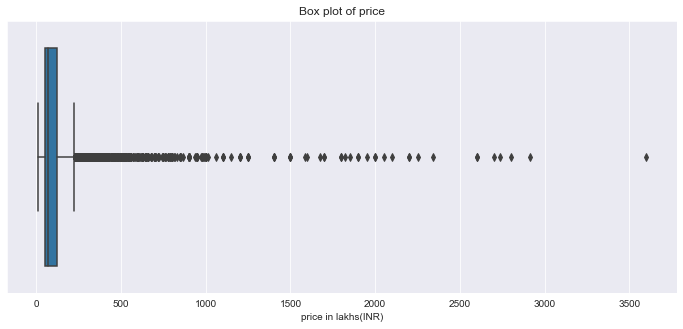

In [10]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.boxplot(train_df['price'], ax=ax)
ax.set(xlabel= 'price in lakhs(INR)', title='Box plot of price')
plt.savefig("Graph/Box plot of price")
plt.show()

In [11]:
# find mode (most frequent occuring price value) of price
print("Mode of Price :", train_df['price'].mode()[0] )

Mode of Price : 75.0


In [12]:
print('Descriptive statistics of price column:\n')
print(train_df['price'].describe())

Descriptive statistics of price column:

count    13320.000000
mean       112.565627
std        148.971674
min          8.000000
25%         50.000000
50%         72.000000
75%        120.000000
max       3600.000000
Name: price, dtype: float64


----
## `Missing Value Visualization`
### Column-Wise
----

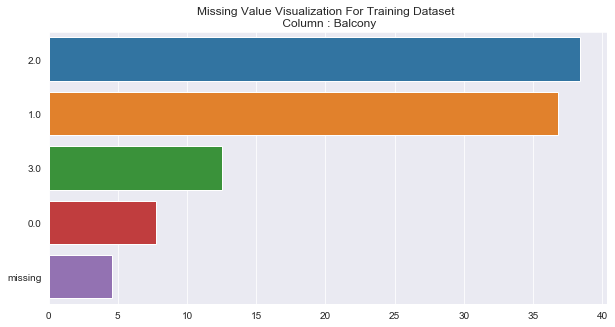

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))
train_couts = train_df['balcony'].fillna('missing').value_counts(normalize=True)
sns.barplot(y = train_couts.index, x= train_couts.values*100)
ax.set(title='Missing Value Visualization For Training Dataset \n Column : Balcony')
plt.savefig("Graph/Balcony Data Visualization")

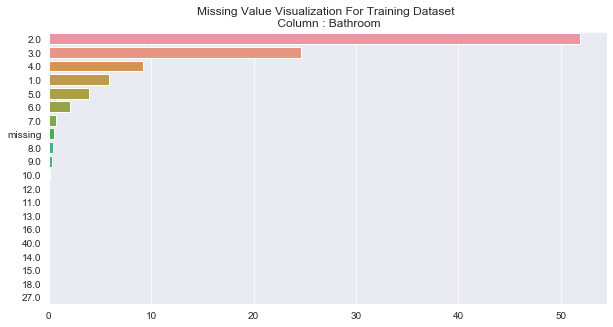

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))
train_couts = train_df['bath'].fillna('missing').value_counts(normalize=True)
sns.barplot(y = train_couts.index, x= train_couts.values*100)
ax.set(title='Missing Value Visualization For Training Dataset \n Column : Bathroom')
plt.savefig("Graph/Bathroom Data Visualization")

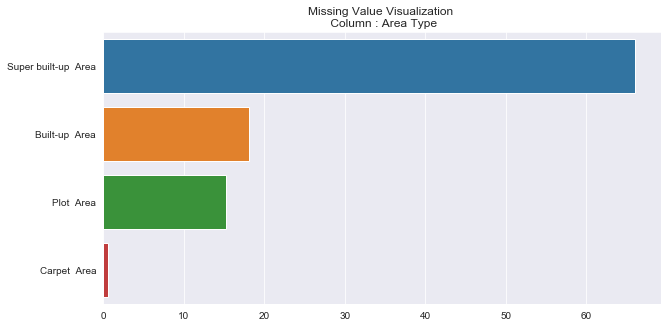

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
train_couts = train_df['area_type'].fillna('missing').value_counts(normalize=True)
sns.barplot(y = train_couts.index, x= train_couts.values*100)
ax.set(title='Missing Value Visualization \n Column : Area Type')
plt.savefig("Graph/Area Type Data Visualization")

No. of House For Ready TO Move

In [16]:
train_df['availability'].value_counts()[0:1]

Ready To Move    10581
Name: availability, dtype: int64

In [17]:
train_df.area_type.value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [18]:
train_df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

----
----

In [19]:
replace_area_type = {'Super built-up  Area': 0, 'Built-up  Area': 1, 'Plot  Area': 2, 'Carpet  Area': 3}
train_df['area_type'] = train_df.area_type.map(replace_area_type)

In [20]:
def replace_availabilty(my_string):
    if my_string == 'Ready To Move':
        return 0
    elif my_string == 'Immediate Possession':
        return 1
    else:
        return 2

In [21]:
train_df['availability'] = train_df.availability.apply(replace_availabilty)

In [22]:
def preprocess_total_sqft(my_list):
    if len(my_list) == 1:
        
        try:
            return float(my_list[0])
        except:
            strings = ['Sq. Meter', 'Sq. Yards', 'Perch', 'Acres', 'Cents', 'Guntha', 'Grounds']
            split_list = re.split('(\d*.*\d)', my_list[0])[1:]
            area = float(split_list[0])
            type_of_area = split_list[1]
            
            if type_of_area == 'Sq. Meter':
                area_in_sqft = area * 10.7639
            elif type_of_area == 'Sq. Yards':
                area_in_sqft = area * 9.0
            elif type_of_area == 'Perch':
                area_in_sqft = area * 272.25
            elif type_of_area == 'Acres':
                area_in_sqft = area * 43560.0
            elif type_of_area == 'Cents':
                area_in_sqft = area * 435.61545
            elif type_of_area == 'Guntha':
                area_in_sqft = area * 1089.0
            elif type_of_area == 'Grounds':
                area_in_sqft = area * 2400.0
            return float(area_in_sqft)
        
    else:
        return (float(my_list[0]) + float(my_list[1]))/2.0

In [23]:
train_df['total_sqft'] = train_df.total_sqft.str.split('-').apply(preprocess_total_sqft)

In [24]:
size_mode = train_df['size'].mode()[0]
train_df.loc[train_df['size'].isna(), 'size'] = size_mode 

In [25]:
train_df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [26]:
train_df['size'] = train_df['size'].apply(lambda x: x.split(' ')[0])

In [27]:
train_df['size'] = train_df['size'].astype('float64')

In [28]:
train_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,0,2,Electronic City Phase II,2.0,Coomee,1056.0,2.0,1.0,39.07
1,2,0,Chikka Tirupathi,4.0,Theanmp,2600.0,5.0,3.0,120.00
2,1,0,Uttarahalli,3.0,NaN,1440.0,2.0,3.0,62.00
3,0,0,Lingadheeranahalli,3.0,Soiewre,1521.0,3.0,1.0,95.00
4,0,0,Kothanur,2.0,NaN,1200.0,2.0,1.0,51.00


In [29]:
train_df.dtypes

area_type         int64
availability      int64
location         object
size            float64
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [30]:
train_df.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [31]:
train_df.balcony.value_counts()

2.0    5113
1.0    4897
3.0    1672
0.0    1029
Name: balcony, dtype: int64

In [32]:
bath_med = train_df['bath'].median()
balcony_med = train_df['balcony'].median()

In [33]:
train_df.loc[train_df['bath'].isna(), 'bath'] = bath_med
train_df.loc[train_df['balcony'].isna(), 'balcony'] = balcony_med

In [34]:
train_df.isnull().sum()

area_type          0
availability       0
location           1
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

In [35]:
train_df['location'].value_counts()

Whitefield                         540
Sarjapur  Road                     399
Electronic City                    302
Kanakpura Road                     273
Thanisandra                        234
                                  ... 
Jaya Nagar East                      1
Sugama Layout                        1
1Hanuman Nagar                       1
Queens Road                          1
4 Bedroom Farm House in Bagalur      1
Name: location, Length: 1305, dtype: int64

In [36]:
mode_loc =train_df['location'].mode()[0]

In [37]:
train_df.loc[train_df['location'].isna(), 'location'] = mode_loc

In [38]:
train_df.isnull().sum()

area_type          0
availability       0
location           0
size               0
society         5502
total_sqft         0
bath               0
balcony            0
price              0
dtype: int64

----
## `Society :`
##### Society Has Lot Of Null Values So It Will Not Consider.

---

In [39]:
train_df.dtypes

area_type         int64
availability      int64
location         object
size            float64
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

In [46]:
train_df['society'].value_counts()

GrrvaGr    80
PrarePa    76
Sryalan    59
Prtates    59
GMown E    56
           ..
Fea 3Al     1
ViortCo     1
SGandea     1
SuodsAc     1
Unentsi     1
Name: society, Length: 2688, dtype: int64

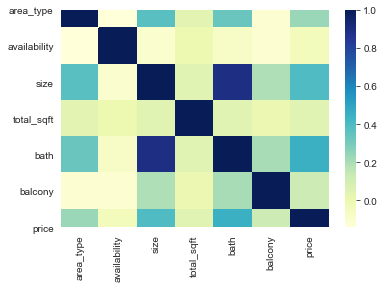

In [49]:
sns.heatmap(train_df.corr(),cmap="YlGnBu")

----
----

# Apply RandomForest
----

In [47]:
X = train_df[['area_type', 'availability' ,'size', 'total_sqft', 'bath', 'balcony']]
y = train_df[['price']]

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [49]:
rf = RandomForestRegressor(n_estimators=600,
                             max_depth= 5,
                             max_leaf_nodes= 15,
                             min_samples_leaf= 3,
                             min_samples_split= 10,
                             random_state=0)
rf.fit(X_train, y_train)

C:\Users\Flash\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
                      max_features='auto', max_leaf_nodes=15,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, n_estimators=600,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [50]:
predict_y = rf.predict(X_test)

# ` Mean-Absolute-Error`
----

In [51]:
mean_absolute_error(y_test,predict_y)

39.98678246899915

# `Accuracy Score`
---

In [52]:
print("Accuracy Score :",int(r2_score(y_test, predict_y)*100),"%")

Accuracy Score : 60 %
